<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%pylab inline




Populating the interactive namespace from numpy and matplotlib


In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")


# testing ARMA and ARIMA with synthetic signal

In [ ]:
x = np.arange(100)
df = pd.DataFrame({"time":x, "y":np.random.randn(100) + # a random noise component
                   np.sin(x*np.pi*0.1)*2 + np.sin(x*np.pi*0.01)*2 # some cyclic components
                   + x * 0.05 + 2 * np.random.randn(100)*0.2 # some stickastic linear trend
                  })

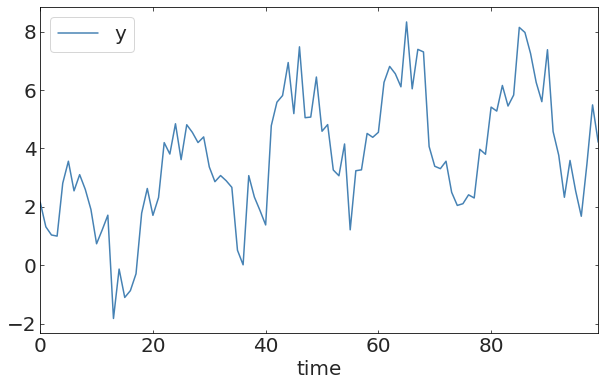

In [ ]:
df.plot(x="time", y="y");

In [ ]:
sm.tsa.stattools.adfuller(df["y"])

(-1.7243435629548034,
 0.41861559125458675,
 11,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 277.0989233825418)

/Users/fbb/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


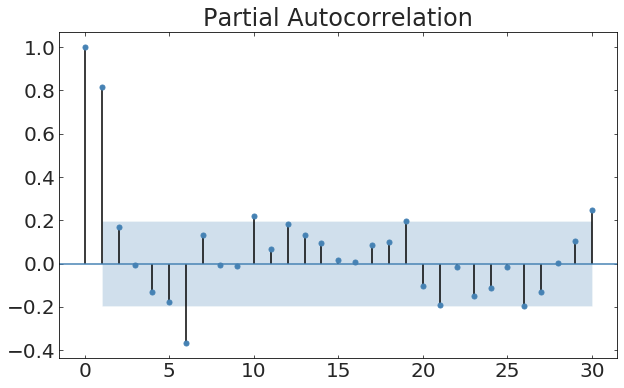

In [ ]:
sm.graphics.tsa.plot_pacf(df["y"], lags=30);

In [ ]:
pmax, qmax = 5, 5
aics = np.zeros((pmax,qmax))
for p in range(pmax):
        for q in range(qmax):
            try:
                mod = sm.tsa.ARIMA(df["y"], (p,1,q)).fit()  
                aics[p][q] = mod.aic
            except:
                aics[p][q] = np.nan
        
pbest,qbest = np.where(aics == np.nanmin(aics))          
print("best parameters: p: {:d} p,q: {:d}".format(pbest[0], qbest[0]))

best parameters: p: 2 p,q: 2


In [ ]:
np.where(aics == np.nanmin(aics))

(array([2]), array([2]))

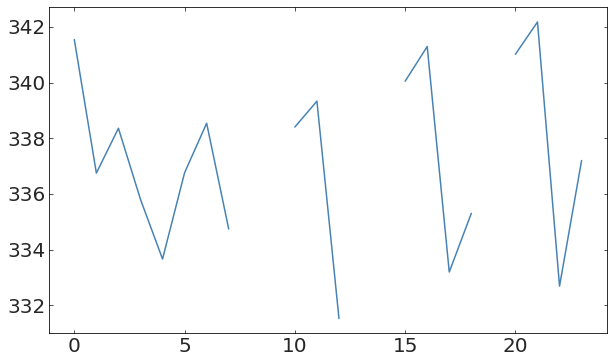

In [ ]:
pl.plot(aics.flatten())

In [ ]:
mod = sm.tsa.ARIMA(df["y"], (pbest[0],1,qbest[0])).fit()  


In [ ]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -159.763
Method:                       css-mle   S.D. of innovations              1.208
Date:                Thu, 20 Feb 2020   AIC                            331.526
Time:                        11:15:37   BIC                            347.097
Sample:                             1   HQIC                           337.826
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0445      0.146      0.304      0.762      -0.242       0.331
ar.L1.D.y      1.0698      0.144      7.455      0.000       0.789       1.351
ar.L2.D.y     -0.4429      0.130     -3.404      0.001      -0.698      -0.188
ma.L1.D.y     -1.4116      0.091    -15.577      0.000      -1.589      -1.234
ma.L2.D.y      0.8655      0.075     11.506      0.000       0.718       1.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2078           -0.8939j            1.5027           -0.1014
AR.2            1.2078           +0.8939j            1.5027            0.1014
MA.1            0.8155           -0.7003j            1.0749           -0.1129
MA.2            0.8155           +0.7003j            1.0749            0.1129
-----------------------------------------------------------------------------
"""

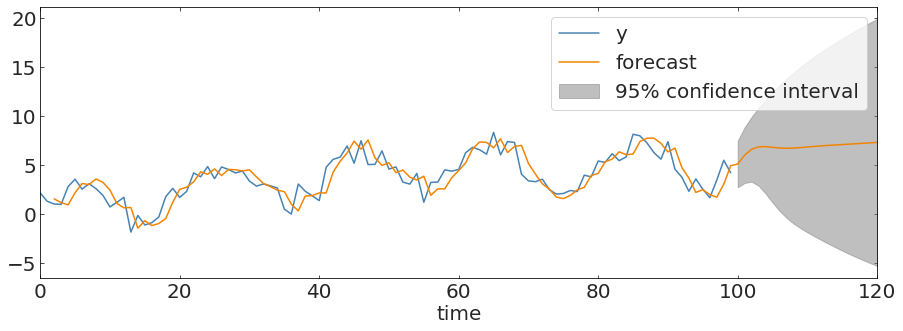

In [ ]:
ax = df.plot(x="time", y="y", figsize=(15,5))
mod.plot_predict(end=120, plot_insample=False, ax=ax);